<a href="https://colab.research.google.com/github/equation-Chris/DM2025-Lab2-Exercise/blob/main/DM2025-Lab2-Optional-Ollama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **(Optional) LLM Master Examples with Ollama**


**Remember that this notebook is not worth any points, it's just extra material**.

---
# **Colab Environment Setup**



In [1]:
# This command installs pciutils, necessary to locate the NVIDIA GPUs in the cloud container
!apt-get install pciutils -y -qq > /dev/null 2>&1

# Download ollama
!curl -fsSL https://ollama.com/install.sh | sh

import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

# Download model gemma3:4b
!ollama pull gemma3:4b

# Download model llama3.2:1b
!ollama pull llama3.2:1b

# Download model gemma3:270m
!ollama pull gemma3:270m

# Download model embeddinggemma
!ollama pull embeddinggemma

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.






In [2]:
!ollama list

NAME                     ID              SIZE      MODIFIED               
embeddinggemma:latest    85462619ee72    621 MB    Less than a second ago    
gemma3:270m              e7d36fb2c3b3    291 MB    Less than a second ago    
gemma3:4b                a2af6cc3eb7f    3.3 GB    1 second ago              
llama3.2:1b              baf6a787fdff    1.3 GB    Less than a second ago    


In [3]:
!ollama run gemma3:270m "What is Data Mining?"

Data Mining is a field of computer science that focuses on **extracting valuable information from data** to gain insights and make better decisions. It involves using techniques to identify patterns, trends, and anomalies in data that might be missed by human analysts. 

Here's a breakdown of key aspects of data mining:

* **Goal:** To discover hidden patterns, relationships, and insights from data.
* **Methods:** Data mining techniques can be applied to a wide range of data sources, including:
    * **Data warehousing:** Organizing and analyzing large datasets into structured formats.
    * **Data mining:** Discovering new patterns, relationships, and insights from data.
    * **Machine learning:** Applying algorithms to learn from data and make predictions or decisions.
    * **Data analysis:** Extracting meaningful insights from data.
    * **Data visualization:** Creating visual representations of data to communicate findings.
    * **Statistical analysis:** Using statistical metho

In [4]:
# Clone Lab 2's github repository to get all of our material first

!git clone https://github.com/difersalest/DM2025-Lab2-Exercise.git

fatal: destination path 'DM2025-Lab2-Exercise' already exists and is not an empty directory.


In [5]:
!apt-get install pciutils -y -qq > /dev/null 2>&1

In [6]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [7]:
!ollama pull gemma3:4b

In [8]:
!ollama pull llama3.2:1b

In [9]:
!ollama pull gemma3:270m

In [10]:
!ollama pull embeddinggemma

In [11]:
!pip3 install python-dotenv==1.1.1 google-genai==1.33.0 langextract==1.0.9 gensim==4.3.3 tensorflow==2.20.0 tensorflow-hub==0.16.1 keras==3.11.3 ollama==0.5.3 langchain==0.3.27 langchain_community==0.3.29 langchain_core==0.3.75 langchain-google-genai==2.1.10 beautifulsoup4==4.13.5 chromadb==1.0.20 gradio==5.44.1 jupyter==1.1.1 scikit-learn==1.7.1 pandas==2.3.2 numpy==1.26.4 matplotlib==3.10.6 plotly==6.3.0 seaborn==0.13.2 nltk==3.9.1 umap-learn==0.5.9.post2 pymupdf==1.26.4

In [12]:
# test code for environment setup
# import library
import dotenv
from google import genai
import langextract
import gensim
import tensorflow
import tensorflow_hub
import keras
import ollama
import langchain
from langchain_community import utils
from langchain_core import prompts
from langchain_google_genai import chat_models
from bs4 import BeautifulSoup
import chromadb
import gradio
import jupyter
import sklearn
import pandas
import numpy
import matplotlib
import plotly
import seaborn
import nltk
import umap
import pymupdf

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.20.0
keras: 3.11.3


---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://drive.google.com/uc?export=view&id=1qurztXdx30Wl2vkCZg7KXXJYJXcE6YR_)

---
## 1. Data Preparation

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [13]:
import pandas as pd

### training data
anger_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [14]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [15]:
### testing data
anger_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [16]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [17]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [18]:
## save to pickle file
train_df.to_pickle("./DM2025-Lab2-Exercise//data/train_df.pkl")
test_df.to_pickle("./DM2025-Lab2-Exercise//data/test_df.pkl")

In [19]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("./DM2025-Lab2-Exercise//data/train_df.pkl")
test_df = pd.read_pickle("./DM2025-Lab2-Exercise//data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---

## **2. Using Ollama with Local Open Source LLMs**

`Before starting you need to have ollama running in the background of your environment.` If you are on your laptop you just need to open the app once and then it will be running the server that python uses in the background.

It should show something like this in order to be used by python:

![ollama_background](https://drive.google.com/uc?export=view&id=1KNA80PYWMbgps--P3Sf65Qy7HtB-NzCP)


If you are in Kaggle or in Colab, after downloading ollama and pulling the required models with the commands explained in the `README.md` it should be ready to be used by python.

*Note that some exercises from the LLM section of our main Master Notebook are not able to be replicated with Ollama*, like being able to do image segmentation, or passing down videos, audio or youtube urls, those can only be replicated by big multi-modal models like Gemini, and in the case of youtube urls that is only possible because it is a Google model with their API service.

If you would like to you can also watch this short tutorial in how to use ollama:

[Learn Ollama in 15 Minutes - Run LLM Models Locally for FREE](https://www.youtube.com/watch?v=UtSSMs6ObqY)

---

### **2.1 Text Prompting**
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [20]:
import ollama
response = ollama.chat(model='gemma3:270m', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? Elaborate on related topics. (in markdown format)'
    },
])

print(response['message']['content'])

Okay, here's an elaboration on data mining, broken down into its core concepts and related topics:

**Data Mining: A Comprehensive Overview**

Data mining is the process of extracting meaningful insights and patterns from large amounts of data. It's a multifaceted field that involves using various techniques to uncover hidden relationships, patterns, and trends within data to make better decisions and improve business processes.

**Core Concepts:**

*   **Data Collection:** Gathering data from various sources, including databases, files, sensors, and other unstructured data formats.
*   **Data Cleaning:** Identifying and correcting errors, inconsistencies, and missing values in the data. This involves removing irrelevant information, handling outliers, and ensuring data quality.
*   **Data Transformation:** Modifying data to make it more suitable for analysis and use. This can involve scaling, encoding, and transforming data formats.
*   **Data Analysis:** Using statistical methods, ma

**We can use the IPython library to make the response look better:**

In [21]:
from IPython.display import display, Markdown
display(Markdown('*some markdown* $\phi$'))

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2683151520.py:2: SyntaxWarning: invalid escape sequence '\p'
  display(Markdown('*some markdown* $\phi$'))


*some markdown* $\phi$

In [22]:
display(Markdown(response['message']['content']))

Okay, here's an elaboration on data mining, broken down into its core concepts and related topics:

**Data Mining: A Comprehensive Overview**

Data mining is the process of extracting meaningful insights and patterns from large amounts of data. It's a multifaceted field that involves using various techniques to uncover hidden relationships, patterns, and trends within data to make better decisions and improve business processes.

**Core Concepts:**

*   **Data Collection:** Gathering data from various sources, including databases, files, sensors, and other unstructured data formats.
*   **Data Cleaning:** Identifying and correcting errors, inconsistencies, and missing values in the data. This involves removing irrelevant information, handling outliers, and ensuring data quality.
*   **Data Transformation:** Modifying data to make it more suitable for analysis and use. This can involve scaling, encoding, and transforming data formats.
*   **Data Analysis:** Using statistical methods, machine learning algorithms, and other techniques to identify patterns, trends, and relationships in the data.
*   **Interpretation:** Understanding the meaning and significance of the extracted insights. This involves evaluating the accuracy, validity, and reliability of the findings.
*   **Exploratory Data Mining:** Discovering new patterns and relationships that might not have been apparent during traditional data mining techniques.
*   **Reporting and Visualization:** Presenting findings and insights in a clear and concise manner to communicate them effectively to stakeholders.

**Related Topics:**

*   **Data Mining Techniques:**
    *   **Association Rule Mining:** Identifying relationships between variables.
    *   **Clustering:** Grouping data points into similar clusters.
    *   **Classification:** Categorizing data into different classes.
    *   **Regression:** Predicting future values based on past values.
    *   **Anomaly Detection:** Identifying unusual data points that deviate from the norm.
    *   **Time Series Analysis:** Analyzing data over time to identify trends and patterns.
    *   **Natural Language Processing (NLP):** Analyzing text data to extract meaning and insights.
    *   **Computer Vision:** Analyzing images and videos to identify objects and patterns.
*   **Machine Learning:**
    *   **Supervised Learning:** Training models on labeled data to make predictions.
    *   **Unsupervised Learning:** Discovering hidden patterns and structures in data without labeled examples.
    *   **Regression:** Predicting continuous values.
    *   **Classification:** Predicting categories or labels.
    *   **Clustering:** Grouping data points into similar groups.
    *   **Dimensionality Reduction:** Reducing the number of features in data to make it easier to analyze.
*   **Database Management:**
    *   **Data Warehousing:** Building data warehouses to store and manage large volumes of data.
    *   **Database Design:** Designing effective database schemas to optimize data storage and retrieval.
    *   **Data Integration:** Combining data from multiple sources into a single data base.
*   **Business Intelligence (BI):**
    *   **Data Visualization:** Creating interactive dashboards and reports to communicate data insights to stakeholders.
    *   **Data Analysis:** Using data visualization techniques to identify trends and patterns.
    *   **Reporting:** Generating reports that present data insights in a clear and concise manner.
*   **Data Science:**
    *   **Data Analysis:** Applying statistical methods and machine learning algorithms to analyze data.
    *   **Machine Learning:** Developing and training machine learning models to improve decision-making.
    *   **Data Engineering:** Building and maintaining data pipelines for data processing and analysis.
    *   **Data Science Tools:** Utilizing tools like Python, R, and SQL to automate data analysis and visualization.
*   **Cloud Computing:**
    *   **Data Storage:** Utilizing cloud-based storage solutions for storing large amounts of data.
    *   **Data Processing:** Using cloud-based data processing services for efficient data analysis and visualization.
    *   **Data Integration:** Integrating data from multiple sources into a unified data environment.

**Applications of Data Mining:**

*   **Business Intelligence (BI):**
    *   Creating dashboards and reports to visualize data insights.
    *   Automating data analysis and reporting.
    *   Generating reports that present data insights in a clear and concise manner.
    *   Identifying trends and patterns in data.
*   **Customer Relationship Management (CRM):**
    *   Analyzing customer data to understand customer behavior and preferences.
    *   Personalizing customer experiences.
    *   Improving customer satisfaction.
*   **Fraud Detection:**
    *   Identifying patterns and anomalies in financial transactions.
    *   Predicting fraudulent activity.
    *   Improving fraud prevention measures.
*   **Healthcare:**
    *   Analyzing medical records to identify disease outbreaks.
    *   Personalizing treatment plans.
    *   Improving healthcare efficiency.
*   **Financial Analysis:**
    *   Analyzing financial data to identify investment opportunities.
    *   Predicting market trends.
    *   Optimizing investment strategies.
*   **Marketing:**
    *   Analyzing customer data to improve marketing campaigns.
    *   Personalizing marketing messages.
    *   Identifying customer segments.
*   **Supply Chain Management:**
    *   Analyzing supply chain data to optimize logistics.
    *   Predicting demand.
    *   Improving inventory management.

**Benefits of Data Mining:**

*   **Improved Decision-Making:** Data mining provides insights that can help organizations make better decisions.
*   **Increased Efficiency:** Data mining can automate tasks and streamline processes.
*   **Enhanced Accuracy:** Data mining can reduce the risk of errors.
*   **Better Understanding of Business:** Data mining can help organizations understand their business processes better.
*   **Improved Insights:** Data mining can uncover hidden patterns and relationships that are not visible to the outside world.

**Challenges of Data Mining:**

*   **Data Quality:** Data mining can be difficult to interpret and validate.
*   **Data Volume:** Large datasets can be difficult to handle and analyze.
*   **Data Security:** Sensitive data can be vulnerable to security breaches.
*   **Lack of Expertise:** Data mining requires specialized skills and expertise.
*   **Bias:** Data mining can be biased if the data is not representative of the population.

**In Summary:**

Data mining is a powerful tool that can be used to extract valuable insights from large amounts of data. It's a multifaceted field that involves using various techniques to uncover hidden relationships, patterns, and trends. While data mining has many benefits, it also presents challenges and requires careful consideration. By understanding the core concepts and related topics, you can better appreciate the potential of data mining and its applications.

---
### **2.2 Structured Output**

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Ollama's Structured Output Documentation](https://ollama.com/blog/structured-outputs)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/)

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [23]:
import ollama
from pydantic import BaseModel

# We define our structure schema that our ollama model should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The middle structure to define what a topic object should have
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

# The top-level structure that groups all of our Topic Objects
class TopicsList(BaseModel):
    topics: list[Topic]

input_prompt = 'Explain what are machine learning, data centers, llms and how do they relate to each other. **Answer in the provided JSON schema**'
system_prompt = 'You are a helpful assistant that answers any question in the provided **JSON Schema**'
# Note: gemma3:270m is a small model so it might not be good to understand structured output, you can try with bigger models
# We input our json schema in the "format" parameter
response = ollama.chat(model='gemma3:270m',
                       format=TopicsList.model_json_schema(), # Set our schema
                       options={'temperature': 0},  # Set temperature to 0 for more deterministic output
                       messages=[
                        {
                            'role': 'system',
                            'content': system_prompt # Instruction prompt for the model
                        },
                        {
                            'role': 'user',
                            'content': input_prompt # Our prompt
                        },
                    ]
)

# We validate that the output follows our schema
topics = TopicsList.model_validate_json(response.message.content)
print(topics)

topics=[Topic(topic_name='Machine Learning', subsections=[Subsection(sub_title='What is Machine Learning?', sub_explanation="Machine learning is a subset of machine learning. It involves training algorithms on data to learn patterns and make predictions or decisions without explicit programming. It's a powerful technique for automating tasks, improving accuracy, and uncovering hidden insights in data."), Subsection(sub_title='Data Centers', sub_explanation='Data centers are physical locations where data is stored, processed, and replicated. They provide a secure and reliable environment for storing and processing large amounts of data.'), Subsection(sub_title='LLMs (Large Language Models)', sub_explanation='LLMs are a type of machine learning model that is trained on massive amounts of text data. They can understand and generate human-like text, which is used for a wide range of applications, including chatbots, text-to-speech, and content creation.')]), Topic(topic_name='Data Centers'

In [24]:
# We can obtain the json dict in this way:
struct_topics = topics.model_dump()
struct_topics

{'topics': [{'topic_name': 'Machine Learning',
   'subsections': [{'sub_title': 'What is Machine Learning?',
     'sub_explanation': "Machine learning is a subset of machine learning. It involves training algorithms on data to learn patterns and make predictions or decisions without explicit programming. It's a powerful technique for automating tasks, improving accuracy, and uncovering hidden insights in data."},
    {'sub_title': 'Data Centers',
     'sub_explanation': 'Data centers are physical locations where data is stored, processed, and replicated. They provide a secure and reliable environment for storing and processing large amounts of data.'},
    {'sub_title': 'LLMs (Large Language Models)',
     'sub_explanation': 'LLMs are a type of machine learning model that is trained on massive amounts of text data. They can understand and generate human-like text, which is used for a wide range of applications, including chatbots, text-to-speech, and content creation.'}]},
  {'topic_na

In [25]:
print(type(struct_topics))

<class 'dict'>


In [26]:
# Explore all the topics names
for topic in struct_topics['topics']:
    print(topic['topic_name'])

Machine Learning
Data Centers


In [27]:
# Explore the subsections of the topics
for topic in struct_topics['topics']:
    for subsection in topic['subsections']:
        print(subsection['sub_title'])

What is Machine Learning?
Data Centers
LLMs (Large Language Models)
How do Data Centers Work?
Data Processing
Data Storage


In [28]:
# We can structure all together
for topic in struct_topics["topics"]:
    print(f'\n\nTopic: {topic["topic_name"]}')
    for subsection in topic["subsections"]:
        print(f'\nSubsection: {subsection["sub_title"]}')
        print(f'\tExplanation: {subsection["sub_explanation"]}\n')



Topic: Machine Learning

Subsection: What is Machine Learning?
	Explanation: Machine learning is a subset of machine learning. It involves training algorithms on data to learn patterns and make predictions or decisions without explicit programming. It's a powerful technique for automating tasks, improving accuracy, and uncovering hidden insights in data.


Subsection: Data Centers
	Explanation: Data centers are physical locations where data is stored, processed, and replicated. They provide a secure and reliable environment for storing and processing large amounts of data.


Subsection: LLMs (Large Language Models)
	Explanation: LLMs are a type of machine learning model that is trained on massive amounts of text data. They can understand and generate human-like text, which is used for a wide range of applications, including chatbots, text-to-speech, and content creation.



Topic: Data Centers

Subsection: How do Data Centers Work?
	Explanation: Data centers are physical facilities t

---

### **2.3 Multi-Modal Prompting - Text + Images**
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](https://drive.google.com/uc?export=view&id=1db0ADdbvOAqfxyQcbsaO7tFdmtMWhntA)

source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.jpg](https://drive.google.com/uc?export=view&id=1v7ifSHvpxLVDSrIkZlj7mkp4hY1awTgx)

source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [29]:
import ollama
response2 = ollama.chat(model='gemma3:4b', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./DM2025-Lab2-Exercise/pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

This image is about a Shiba Inu dog caught mid-leap, looking incredibly joyful and energetic. 

Here's a breakdown of what's happening:

*   **Subject:** It's a Shiba Inu, a popular Japanese breed known for its fox-like appearance and playful personality.
*   **Action:** The dog is in the middle of a jump, captured in a moment of exuberant movement.
*   **Expression:** Its open mouth and bright eyes convey a feeling of excitement and happiness.
*   **Setting:** It appears to be in a grassy area, likely a park or yard.

Overall, it’s a charming and dynamic photo celebrating the playful spirit of this adorable dog breed.

In [30]:
response3 = ollama.chat(model='gemma3:4b', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./DM2025-Lab2-Exercise/pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image is a close-up photo of a beautiful tabby kitten. Specifically, it appears to be a British Shorthair kitten due to its dense, plush coat and classic tabby markings. 

It's a simple, appealing image focused entirely on the cute and striking appearance of the kitten.

---

### **2.4 Tool Calling:**

Up to now we have seen how prompting, text and multimodal, lets a model **generate responses directly.** But sometimes we want the model to do more than just talk: to **fetch information, compute something, or take an action.** This is where tool calling (also called *function calling* or *agents*) comes in.

#### General Idea

Tool calling means the model can decide, instead of replying only with text, to **call an external function** that you have made available. You give the model a list of tools, each described by their **name, purpose, and input parameters,** and the model chooses when to use them.

So the order is something like this:
1.	You declare tools (name, purpose, inputs).
2.	The model checks the user request and may return a function_call.
3.	Your system runs the function.
4.	The result is sent back, and the model uses it to craft the final response.

For more information you can check: [Ollama Documentation | Tool Support](https://ollama.com/blog/tool-support)

List of ollama models that support `tools`: [Supported models](https://ollama.com/search?c=tools)

For this example we are going to use `llama3.2:1b` because it supports tool calling with ollama.

In [31]:
def simple_math(a: int, b: int, operation: str) -> int | float:
    """
    Performs a simple mathematical operation on two numbers.
    Args:
        a: The first number.
        b: The second number.
        operation: The operation to perform. Must be one of 'add', 'subtract', 'multiply', or 'divide'.
    Returns:
        The result of the mathematical operation.
    """
    # Double validating the input
    a = int(a)
    b = int(b)
    if operation == 'add':
        return a + b
    elif operation == 'subtract':
        return a - b
    elif operation == 'multiply':
        return a * b
    elif operation == 'divide':
        return a / b
    else:
        raise ValueError("Invalid operation. Please choose from 'add', 'subtract', 'multiply', or 'divide'.")

In [32]:
simple_math_declaration = {
      'type': 'function',
      'function': {
        'name': 'simple_math',
        'description': 'Perform a simple mathematical operation',
        'parameters': {
          'type': 'object',
          'properties': {
            'a': {
              'type': 'integer',
              'description': 'The first number',
            },
            'b': {
              'type': 'integer',
              'description': 'The second number',
            },
            'operation': {
                'type': 'string',
                'enum': ["add", "subtract", "multiply", "divide"],
                'description': "The mathematical operation to perform, one of 'add', 'subtract', 'multiply', 'divide'",
            }
          },
          'required': ['a', 'b', 'operation'],
        },
      },
    }

In [33]:
import ollama
# Example tool calling with ollama
# You can try changing this prompt to use substraction, multiplication or division
user_input = 'What is 5 plus 10?'
response = ollama.chat(
    model='llama3.2:1b',
    messages=[{'role': 'user', 'content': user_input}],
    tools=[simple_math_declaration],
)

print(response['message']['tool_calls'])

[ToolCall(function=Function(name='simple_math', arguments={'a': '5', 'b': '10', 'operation': 'add'}))]


In [34]:
response.message.tool_calls[0].function.arguments

{'a': '5', 'b': '10', 'operation': 'add'}

In [35]:
available_functions = {
  'simple_math': simple_math,
}

In [36]:
function_output = None
if response.message.tool_calls:
  # There may be multiple tool calls in the response
  for tool in response.message.tool_calls:
    # Ensure the function is available, and then call it
    if function_to_call := available_functions.get(tool.function.name):
      print('Calling function:', tool.function.name)
      print('Arguments:', tool.function.arguments)
      function_output = function_to_call(**tool.function.arguments)
      print('Function output:', function_output)
    else:
      print('Function', tool.function.name, 'not found')

Calling function: simple_math
Arguments: {'a': '5', 'b': '10', 'operation': 'add'}
Function output: 15


In [37]:
from IPython.display import display, Markdown


system_prompt_agent = "You are a tool agent that needs to answer back to the user in a polite manner in Markdown format.\
                        Answer back in an objective manner referencing only the result of the tool call."
concluding_remark = f"The user asked: {user_input} \nThe result of the tool call was this: {function_output} \
                        \nGive a response to the user:"
response_agent = ollama.chat(
    model='llama3.2:1b',
    messages=[{'role': 'system', 'content': system_prompt_agent},
              {'role': 'user', 'content': concluding_remark}],
)
display(Markdown(response_agent["message"]["content"]))

## The Tool Call Result
The tool call result for `5 + 10` is `15`.

## User's Inquiry Response
User: What is 5 plus 10?

## Agent's Response
Response to User: The calculation outcome for `5 + 10` is indeed `15`.

---
### **2.5 Information Extraction and Grounding:**

We've already seen how to get structured data from LLMs using techniques like structured prompting and function calling. These methods are powerful for turning an LLM's understanding into a machine-readable format. However, as we build more complex applications, two critical challenges emerge: **trust** and **scalability**.

1.  **Trust and Verifiability (Grounding):** How can we be sure the information an LLM provides is accurate and actually comes from the source text we gave it? LLMs can sometimes "hallucinate" or infer information that isn't present. **Grounding** is the process of linking every piece of extracted data directly back to its specific origin in the source document. This creates a verifiable audit trail, allowing a human or another system to confirm the information's source, which is essential in high-stakes domains like medicine, finance, and legal analysis.

2.  **Scalability and Reliability (Extraction):** While function calling is excellent for specific tasks, building a robust pipeline to extract complex information from long, messy documents requires a more specialized approach. We need a system that can handle large texts, consistently enforce a desired output schema across thousands of documents, and make the results easy for humans to review.

This is where specialized libraries for information extraction come in, providing a framework that prioritizes both grounding and reliable structuring of data.

---
#### `langextract`: A Library for Grounded Extraction**

Google's open-source Python library, `langextract`, is designed specifically to solve these problems. It uses the power of LLMs to convert unstructured text into structured data, with a strong emphasis on reliability and traceability. Instead of just getting a JSON object, `langextract` provides a complete solution for building trustworthy extraction pipelines.

Here are its key features:

*   **Precise Source Grounding:** This is the library's core strength. Every single piece of extracted data is mapped to its exact character position in the original text. This means you can always trace an output back to its source, building trust and allowing for easy verification.
*   **Reliable Structured Outputs:** We define the structure of our desired output by providing a few examples (few-shot prompting). `langextract` uses these examples to guide the LLM, ensuring the output consistently follows our defined schema. This makes the data clean, predictable, and ready for analysis or storage.
*   **Adaptable to Any Domain without Fine-Tuning:** We don't need to collect a large dataset or retrain a model. By simply changing our natural language instructions and examples, you can adapt `langextract` to new domains, whether it's extracting clinical data from medical notes, key clauses from legal contracts, or financial figures from earnings reports.
*   **Optimized for Long Documents:** The library is built to handle lengthy texts that might exceed a standard LLM's context window. It employs smart chunking and multi-pass strategies to effectively find "needles in a haystack" within large documents.
*   **Flexible LLM Support:** `langextract` is model-agnostic. While it's optimized for powerful models like Google's Gemini or OpenAI models, it also supports local, open-source models (via Ollama), or even custom providers, giving us the flexibility to balance performance, cost, and data privacy.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### **Using PDF Documents:**

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

In [38]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./DM2025-Lab2-Exercise/data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './DM2025-Lab2-Exercise/data/documents/doc_example_review_interstellar.pdf'


In [39]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

In [40]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    You are an information extraction agent that grounds the text data with the input.
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input to put in the extracted text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Format your answer in the provided JSON Format like in the examples:
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [41]:
import os
import langextract as lx
from langextract.core import data

# We define our main langextract function
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemma3:4b", extraction_passes = 1, max_workers = 5, max_char_buffer = 400):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        model_url="http://localhost:11434",     # Port where ollama is located in the system/container
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,                # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer,        # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")

    output_dir = "./DM2025-Lab2-Exercise/results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")

    # returning html content for display
    return html_content

In [42]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, file_name = "review_extraction_ollama_example")

Extracted 24 entities:

• opinion_statement: 'to be a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive
• opinion_statement: 'artistically impresses the audience'
  - subject: the audience
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'characters solve their problems'
  - subject: the characters
  - sentiment: Positive
  - key_phrase: solve their problems
• opinion_statement: 'tackles the idea of dreams'
  - subject: he
  - sentiment: Positive
  - key_phrase: tackles the idea
• opinion_statement: 'is so farfetched'
  - subject: this idea
  - sentiment: Negative
  - key_phrase: so farfetched
• audience_impact: 'without seeming unrealistic'
  - emotion_evoked: ['comfortable', 'relaxed']
  - causal_element: Nolan is free to use his creativity
  - target_audience: the audience
• opinion_statement: 'a truly clever plot'
  - subject: The p

LangExtract: Saving to review_extraction_ollama_example.jsonl: 1 docs [00:00, 439.70 docs/s]

✓ Saved 1 documents to review_extraction_ollama_example.jsonl



LangExtract: Loading review_extraction_ollama_example.jsonl: 100%|██████████| 12.7k/12.7k [00:00<00:00, 9.31MB/s]

✓ Loaded 1 documents from review_extraction_ollama_example.jsonl
✓ Visualization saved to ./DM2025-Lab2-Exercise/results/info_extractions/review_extraction_ollama_example_vis.html


In [43]:
html_content

---
### 2.6 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., embeddinggemma). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM (e.g. gemma3:270m) generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [44]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "embeddinggemma" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/think/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    # print("Context:",context, "\n")
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='gemma3:270m', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("Based on the context, what is explained about the new architectures that have emerged?")
display(Markdown(result))

/tmp/ipython-input-3726218425.py:22: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model


The provided context describes the development and evolution of LLMs, highlighting their key advancements and challenges. It explains the underlying principles behind these advancements, such as the self-attention mechanism, the use of parallelization, and the integration of pre-trained models. The context also mentions the increasing capabilities of LLMs in various tasks, such as text generation, translation, question answering, and code generation. The text also touches upon the importance of training LLMs on large datasets to improve their performance and reasoning abilities.


##### **Actual content in the URL:**

We see that the output does retrieve the correct new architectures described in the blog from IBM.

![ibm.png](https://drive.google.com/uc?export=view&id=1CwrcunCGN0XykfVZm-Md76pXgfuBIJ3L)

source: https://www.ibm.com/think/topics/large-language-models


---

### 2.7 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with embeddinggemma for our dataset:**

In [45]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='embeddinggemma',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [46]:
# We use the text column
column_name = 'text'

# This task might take some time to process depending on the GPU (5 to 10 mins)
# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [47]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [48]:
df_train #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
2787,30783,@faithstrust @TheeCurrentYear imagine being th...,joy,0.154,"[-0.1450190246105194, -0.05514572560787201, 0...."
1169,20312,I feel ghastly and I'm really hoping it's just...,fear,0.620,"[-0.04558875411748886, 0.0321241058409214, 0.0..."
1462,20605,"you make my heart shake, bend and break.'",fear,0.473,"[-0.10197202861309052, -0.002728707855567336, ..."
900,20043,Gonna get some acupuncture today for all my da...,fear,0.854,"[-0.15109209716320038, 0.03799540176987648, 0...."
1365,20508,@EurekaForbes U got to b kidding me. Anu from ...,fear,0.521,"[-0.13159337639808655, 0.00040270769386552274,..."
...,...,...,...,...,...
3473,40646,@wabermes The @RavalliRepublic had a good one ...,sadness,0.312,"[-0.15827247500419617, -0.007351941429078579, ..."
2887,40060,My soul is weary of fighting the battles in th...,sadness,0.771,"[-0.11900800466537476, 0.07755324989557266, 0...."
1921,21064,bout to read this article 'Moving the Conversa...,fear,0.224,"[-0.12766559422016144, 0.021868707612156868, -..."
3261,40434,Im so serious about putting words in my mouth ...,sadness,0.458,"[-0.07039203494787216, 0.028464678674936295, 0..."


In [49]:
df_test #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
24,10881,"@DxfyingGrxvity - frustration, looking up at E...",anger,0.604,"[-0.06643946468830109, 0.014921197667717934, 0..."
99,21162,"@madhav_pastey moral of the story, never check...",fear,0.354,"[-0.07714664936065674, -0.021323187276721, 0.0..."
276,40789,"Stars, when you shine,\nYou know how I feel.\n...",sadness,0.292,"[-0.10163865238428116, -0.009713797830045223, ..."
213,30842,TheNiceBot: IndyMN I thought the holidays coul...,joy,0.769,"[-0.09398753196001053, 0.031547799706459045, 0..."
163,21226,@ChrissyCostanza and have social anxiety. Ther...,fear,0.771,"[-0.08512485772371292, -0.0695485919713974, -0..."
...,...,...,...,...,...
28,10885,I wouldn't have #anger issues.....if she didn'...,anger,0.500,"[-0.09091190248727798, 0.0018899183487519622, ..."
241,30870,@Communism_Kills i get the subway melt and mak...,joy,0.380,"[-0.07357257604598999, -0.021206891164183617, ..."
287,40800,“Dyslexia is the affliction of a frozen genius...,sadness,0.333,"[-0.06790170073509216, -0.005550979170948267, ..."
301,40814,Before the year ends I'll probably get master ...,sadness,0.208,"[-0.05811232328414917, 0.03660433366894722, 0...."


In [50]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([df_train, df_test], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28)
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Compared to the version in our main master notebook, here we were able to process the embeddings for all of our rows in the dataset.
And we can see that also with these Embedding-Gemma model's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. And in the same manner it might be because of our emotions are not discrete and it gets reflected in our results here.

---

Because now we have processed all of our data (not like in the master notebook), let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new embeddinggemma embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [52]:
len(df_train["embeddings"][0]) # embeddinggemma model's embedding dimension is 768

768

In [53]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.7060518731988472


In [54]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.66      0.73      0.69        84
        fear       0.72      0.76      0.74       110
         joy       0.79      0.72      0.75        79
     sadness       0.65      0.58      0.61        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347



In [55]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

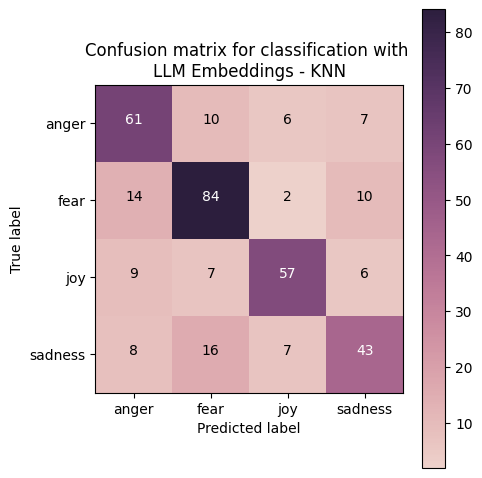

In [56]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [57]:
X_embgemma_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [58]:
X_embgemma_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [59]:
X_embgemma_train.shape #(Number of data, embeddinggemma embedding size)

(3613, 768)

In [60]:
X_embgemma_test.shape #(Number of data, embeddinggemma embedding size)

(347, 768)

In [61]:
# deal with label (string -> one-hot)
import keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2787     joy
1169    fear
1462    fear
900     fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [62]:
#One-hot encoding our labels
y_train_embgemma = label_encode(label_encoder, y_train)
y_test_embgemma = label_encode(label_encoder, y_test)

In [63]:
# I/O check
input_shape_embgemma = len(X_embgemma_train[0])
print('input_shape: ', input_shape_embgemma)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  768
output_shape:  4


In [64]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_embgemma, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,636 (209.52 KB)

 Trainable params: 53,636 (209.52 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('./DM2025-Lab2-Exercise/logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_embgemma_train, y_train_embgemma,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_embgemma_test, y_test_embgemma))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5826 - loss: 1.0757 - val_accuracy: 0.7493 - val_loss: 0.7542
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7459 - loss: 0.6910 - val_accuracy: 0.7896 - val_loss: 0.6754
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7874 - loss: 0.5835 - val_accuracy: 0.7752 - val_loss: 0.6825
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8082 - loss: 0.5281 - val_accuracy: 0.7522 - val_loss: 0.6839
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8248 - loss: 0.4690 - val_accuracy: 0.7522 - val_loss: 0.6928
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8406 - loss: 0.4265 - val_accuracy: 0.7406 - val_loss: 0.7397
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8572 - loss: 0.3874 - val_accuracy: 0.7378 - val_loss: 0.7612
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8724 - loss: 0.3479 - val_accuracy: 0

In [66]:
## predict
pred_result = model.predict(X_embgemma_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step


array([[9.9999475e-01, 3.7570477e-08, 8.3925141e-07, 4.3202626e-06],
       [3.3821752e-06, 9.9876577e-01, 5.1588594e-04, 7.1494450e-04],
       [2.0153126e-05, 8.1178322e-03, 9.9060673e-01, 1.2553014e-03],
       [1.3833144e-09, 6.8359236e-06, 9.9999154e-01, 1.6418300e-06],
       [2.6831729e-06, 9.9915886e-01, 2.2943739e-06, 8.3611516e-04]],
      dtype=float32)

In [67]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'fear', 'joy', 'joy', 'fear'], dtype=object)

In [68]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_embgemma), pred_result), 2)))

testing accuracy: 0.69


In [69]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("./DM2025-Lab2-Exercise/logs/training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.582618,1.075651,0.749280,0.754155
1,1,0.745917,0.691023,0.789625,0.675354
2,2,0.787434,0.583497,0.775216,0.682495
3,3,0.808193,0.528061,0.752161,0.683852
4,4,0.824799,0.468984,0.752161,0.692830
5,5,0.840576,0.426524,0.740634,0.739685
6,6,0.857182,0.387439,0.737752,0.761159
7,7,0.872405,0.347898,0.743516,0.810661
8,8,0.885414,0.311883,0.714697,0.900847
9,9,0.898976,0.282925,0.726225,0.861188


In [70]:
print(classification_report(y_true=label_decode(label_encoder, y_test_embgemma), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.63      0.70      0.66        84
        fear       0.72      0.68      0.70       110
         joy       0.81      0.72      0.77        79
     sadness       0.63      0.68      0.65        74

    accuracy                           0.69       347
   macro avg       0.70      0.70      0.70       347
weighted avg       0.70      0.69      0.70       347



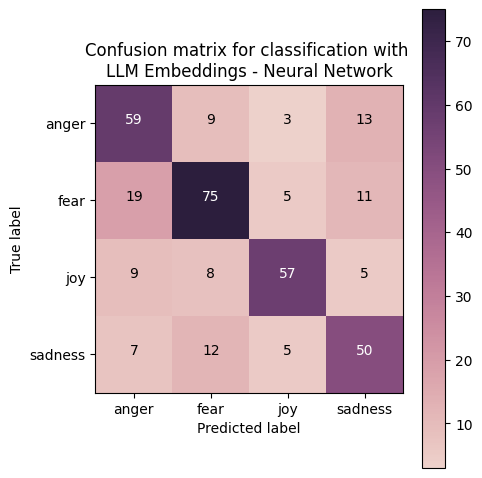

In [71]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_embgemma), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

---

### 2.8 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [72]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df

In [73]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
from pydantic import BaseModel

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "gemma3:4b" # gemma3:270m  gemma3:4b  llama3.2:1b

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotion(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'

class EmotionLabel(BaseModel):
    label: Emotion

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, format=EmotionLabel.model_json_schema(), messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        emotion_result = EmotionLabel.model_validate_json(result.message.content)

        # response = result['message']['content'].strip().lower()  # Clean and standardize the response
        response = str(emotion_result.model_dump()['label'])
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Accuracy: 51.25%
              precision    recall  f1-score   support

       anger       0.43      0.65      0.52        20
        fear       0.86      0.30      0.44        20
         joy       0.56      0.70      0.62        20
     sadness       0.44      0.40      0.42        20

    accuracy                           0.51        80
   macro avg       0.57      0.51      0.50        80
weighted avg       0.57      0.51      0.50        80



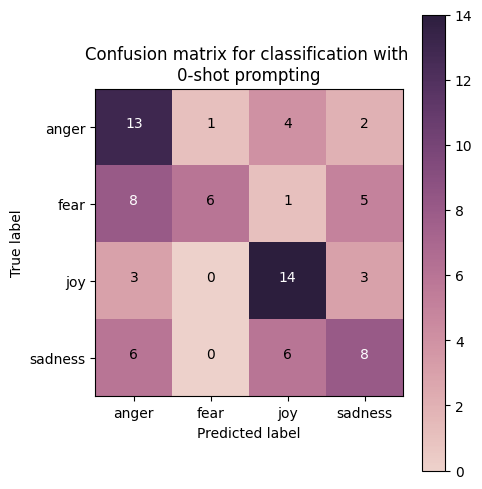

In [74]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: I wonder what would happen if I were to tell some people the truth #savage #uhoh #angry
Emotion: anger

Text: oh yay old scientist builds himself a robot assistant and makes it look like a hot naked woman nothing alarming here
Emotion: fear

Text: In ever use to like smiling until I realized how good my teeth look ... Witout the braces
Emotion: joy

Text: Gonna be a loooooong year as a Browns fan. Longer than normal and that's #sad
Emotion: sadness


Accuracy: 60.00%
              precision    recall  f1-score   support

       anger       0.50      0.65      0.57        20
        fear       0.76      0.65      0.70      

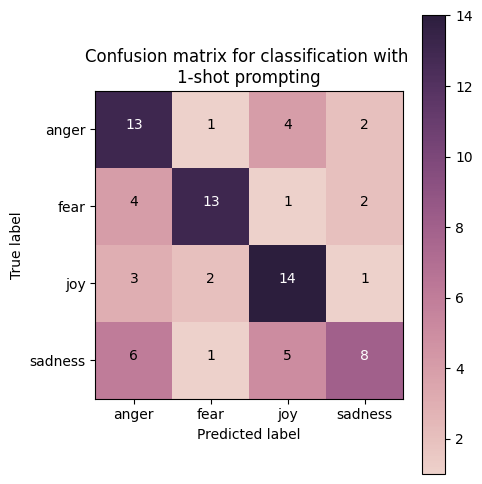

In [75]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: I wonder what would happen if I were to tell some people the truth #savage #uhoh #angry
Emotion: anger

Text: @pbump @AndyRichter  My heart goes out to that woman for the indignity of what she is sitting through.
Emotion: anger

Text: Bes! You don't just tell a true blooded hoopjunkie to switch a f*c@n' team that juz destroyed your own team. You juz don't! #insult
Emotion: anger

Text: Connivers blind to existential fury
Emotion: anger

Text: Fuking fuming 😤
Emotion: anger

Text: oh yay old scientist builds himself a robot assistant and makes it look like a hot naked woman nothing alarming here
Emotion: fear

Text: O you w

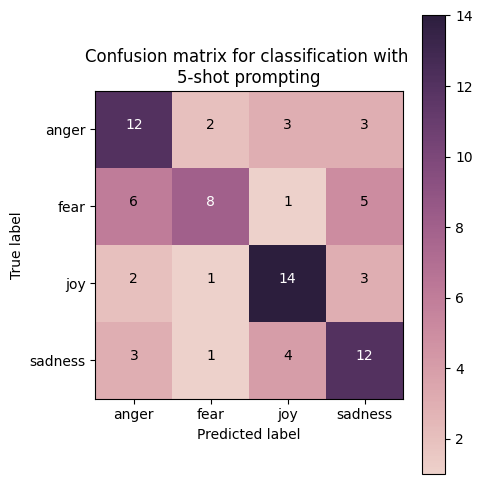

In [76]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

---